Diabetes Prediction on Pima Indians Diabetes Database using Naive Bayes and LinearRegression

Data Desription

Predictor Variables

1. Preganancies - Number of times the patient got pregnant
2. Glucose - Plasma glucose concentration
3. Blood Preassure - Diastolic Blood Preassure (mmHg)
4. Skin Thickness - Triceps skin fold thickness (mm)
5. Insulin - 2-Hour serum insulin (mu U/ml)
6. BMI: Body mass index (weight in kg/(height in m)^2)
7. DiabetesPedigreeFunction: Diabetes pedigree function
8. Age: Age (years)
9. Outcome: Class variable (0 or 1)

In [1]:
#Import necessary libraries
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt


In [11]:
# Loading the Dataset
data = pd.read_csv('/archive (1).zip')

In [14]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [16]:
data.shape

(768, 9)

In [20]:
# Missing values detection and treatment

The following values in a data set are considered to be missing values -

1. Blank Values
2. NaN
3. null
4. Some countinuous columns might have 0's to indicate missing data.

In [21]:
# Lets start by checking the count of records in each column of the data set.
# If the count of records is lesser than the total number of records i.e. 768, we can conclude that there
# are blank records.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [22]:
#The count of records for all the columns is 768, this indicates that there are no blank columns in the data set.

In [23]:
# Since all the predictor columns are continuous in nature, there might be a chance that 0's
#in these columns indicate missing data.

# Lets check the above claim.

In [24]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


From the above description of the data, we can see that columns -
Pregnancies, Glucose, Blood Preassure, Skin Thickness, Insulin and BMI have minimum values of 0.
It makes sense to have 0 prgnancies, but the it does not make sense for other mentioned variables to have a minimum value of 0.
So we can conclude that Glucose, Blood Preassure, Skin Thickness, Insulin and BMI have missing data.
The 0's in these columns should be replaced with the median, since the median is least affected by outliers.

In [28]:
# Replacing the 0's with NaN.
# The records that have 0's in columns Glucose, Blood Preassure, Skin Thickness, Insulin and BMI will be replaced with NaN
from numpy import nan
data['Glucose']= data['Glucose'].replace(0,np.nan)
data['BloodPressure']=data['BloodPressure'].replace(0,np.nan)
data['SkinThickness']= data['SkinThickness'].replace(0,np.nan)
data['Insulin']=data['Insulin'].replace(0,np.nan)
data['BMI']=data['BMI'].replace(0,np.nan)

In [31]:
#Lets check if the above code has worked
data.head()
# All the 0's have been replaced by NaN

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [33]:
# Count of NaN values in the dataset
print(data.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


As inferred columns glucose, Blood Preassure, Skin Thickness, Insulin and BMI have missing data.
Glucose, Blood Preassure and BMI have less number of missing data but skin thickness and Insulin have a very high amount of missing data.
Removing these missing data from the data set will result in information loss and it is not advisable to remove thse records since we have only 768 records.
Hence we will impute these missing values with the median of their respective columns, since median is the least affected by outliers.

In [35]:
data.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                29.0000
Insulin                     125.0000
BMI                          32.3000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [36]:
# imputing missing values with their respective columns with median
data.fillna(data.median(), inplace = True)

In [37]:
# checking if missing values have been imputed or not

In [38]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Outlier detection and treatment

Outlier Detection

Boxplots are a great way of detecting outliers.
Once the outliers have been detected, they can be imputed with the 5th and 95th percentiles.

Text(0.5, 1.0, 'Age')

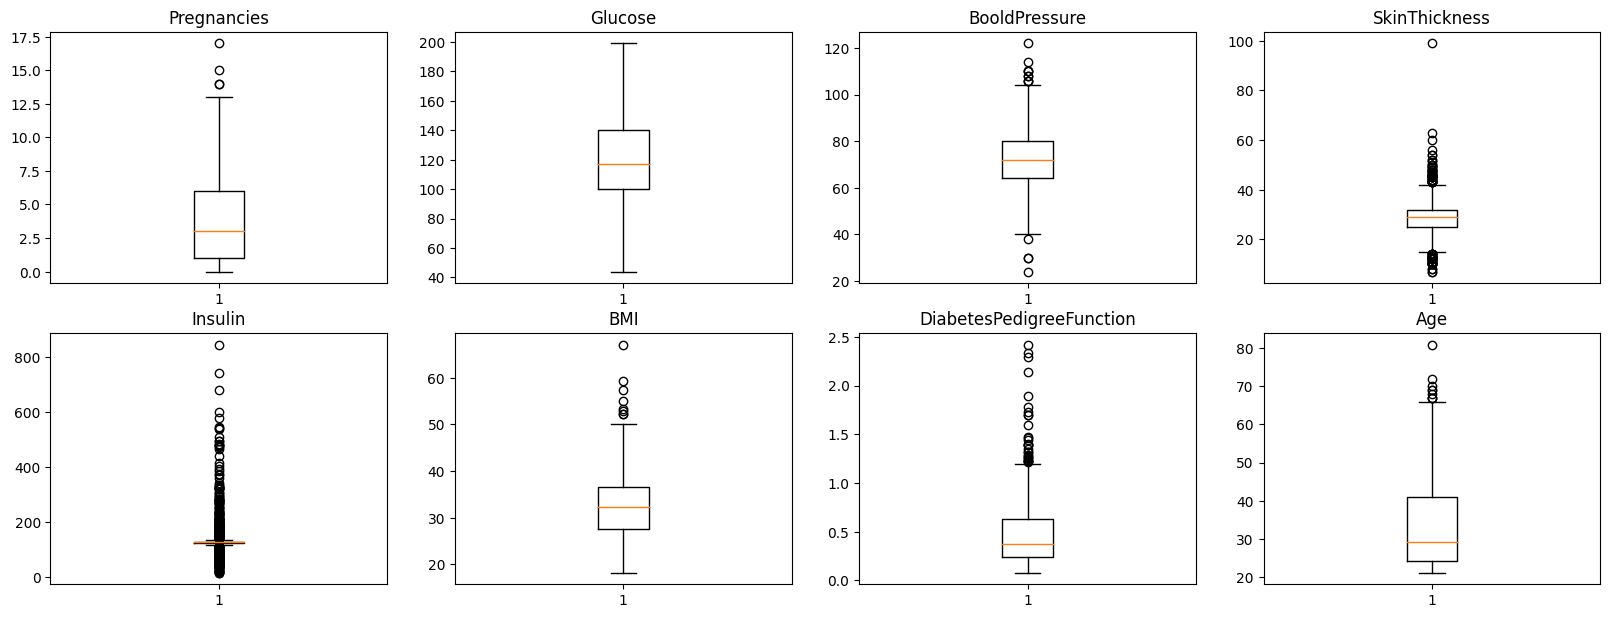

In [44]:
# Outlier detection using boxplot
plt.figure(figsize= (20,15))
plt.subplot(4,4,1)
plt.boxplot(data['Pregnancies'])
plt.title('Pregnancies')


plt.subplot(4,4,2)
plt.boxplot(data['Glucose'])
plt.title('Glucose')

plt.subplot(4,4,3)
plt.boxplot(data['BloodPressure'])
plt.title('BooldPressure')

plt.subplot(4,4,4)
plt.boxplot(data['SkinThickness'])
plt.title('SkinThickness')

plt.subplot(4,4,5)
plt.boxplot(data['Insulin'])
plt.title('Insulin')

plt.subplot(4,4,6)
plt.boxplot(data['BMI'])
plt.title('BMI')

plt.subplot(4,4,7)
plt.boxplot(data['DiabetesPedigreeFunction'])
plt.title('DiabetesPedigreeFunction')

plt.subplot(4,4,8)
plt.boxplot(data['Age'])
plt.title('Age')

Apart from 'Glucose' all the other attributes show preasence of outliers.
These lower level and upper level outliers will be replaced by the 5th and 95th percentile respectively.

In [46]:
data['Pregnancies']=data['Pregnancies'].clip(lower=data['Pregnancies'].quantile(0.05),upper=data['Pregnancies'].quantile(0.95))
data['Glucose']=data['Glucose'].clip(lower=data['Pregnancies'].quantile(0.05), upper=data['Glucose'].quantile(0.95))
data['BloodPressure']=data['BloodPressure'].clip(lower=data['BloodPressure'].quantile(0.05), upper=data['BloodPressure'].quantile(0.95))
data['SkinThickness']= data['SkinThickness'].clip(lower=data['SkinThickness'].quantile(0.05),upper=data['SkinThickness'].quantile(0.95))
data['Insulin']=data['Insulin'].clip(lower=data['Insulin'].quantile(0.05), upper=data['Insulin'].quantile(0.95))
data['DiabetesPedigreeFunction']=data['DiabetesPedigreeFunction'].clip(lower=data['DiabetesPedigreeFunction'].quantile(0.05),upper=data['DiabetesPedigreeFunction'].quantile(0.95))
data['Age']=data['Age'].clip(lower=data['Age'].quantile(0.05),upper=data['Age'].quantile(0.95))

Text(0.5, 1.0, 'Age')

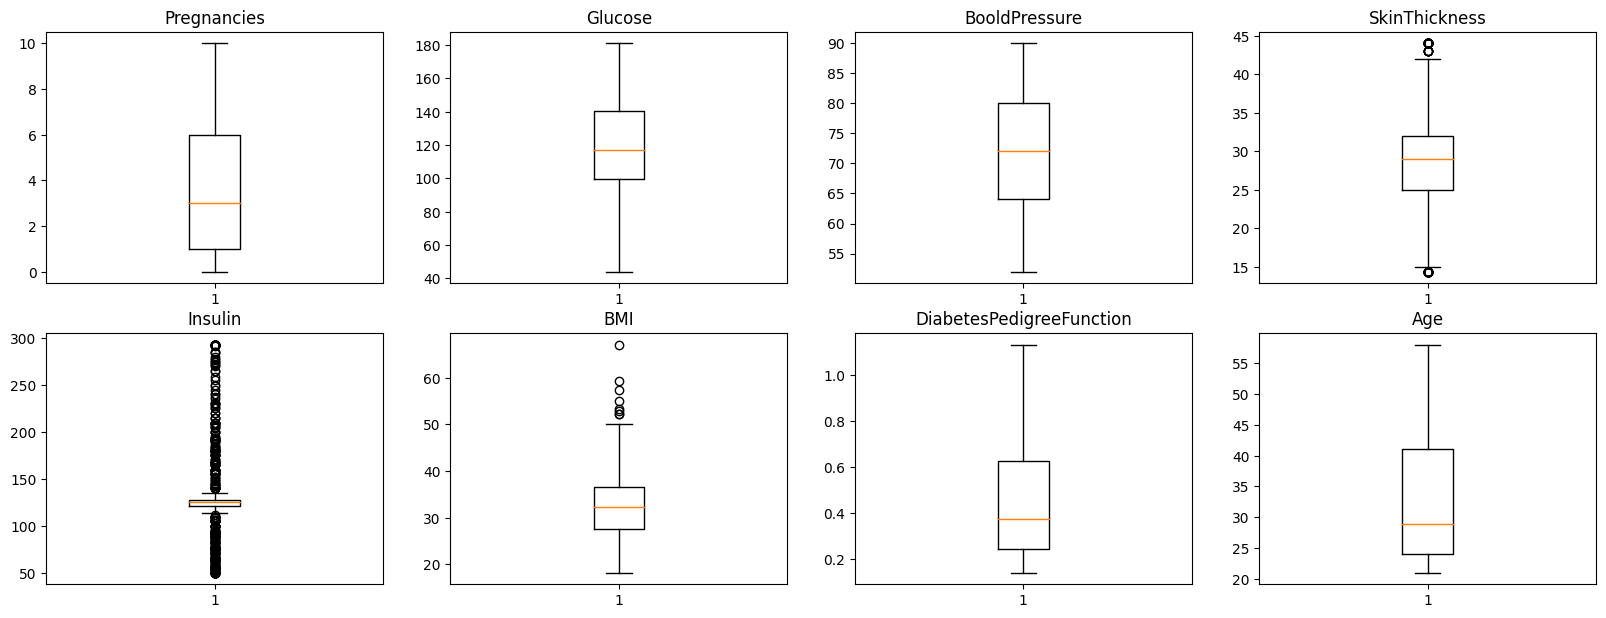

In [47]:
# Again Outlier detection using boxplot
plt.figure(figsize= (20,15))
plt.subplot(4,4,1)
plt.boxplot(data['Pregnancies'])
plt.title('Pregnancies')


plt.subplot(4,4,2)
plt.boxplot(data['Glucose'])
plt.title('Glucose')

plt.subplot(4,4,3)
plt.boxplot(data['BloodPressure'])
plt.title('BooldPressure')

plt.subplot(4,4,4)
plt.boxplot(data['SkinThickness'])
plt.title('SkinThickness')

plt.subplot(4,4,5)
plt.boxplot(data['Insulin'])
plt.title('Insulin')

plt.subplot(4,4,6)
plt.boxplot(data['BMI'])
plt.title('BMI')

plt.subplot(4,4,7)
plt.boxplot(data['DiabetesPedigreeFunction'])
plt.title('DiabetesPedigreeFunction')

plt.subplot(4,4,8)
plt.boxplot(data['Age'])
plt.title('Age')

Text(0.5, 1.0, 'Insulin')

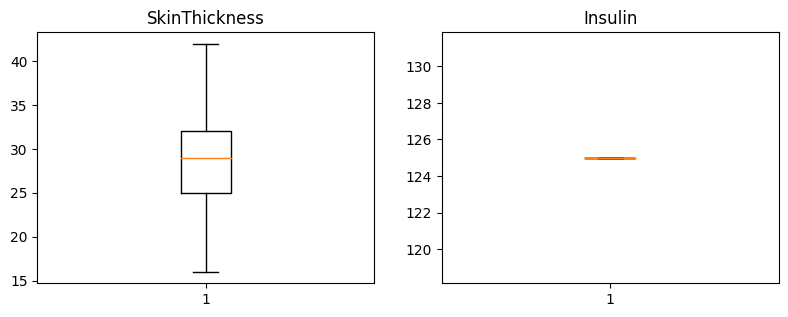

In [89]:
#see, there are still outliers in columns Skin Thickness and Insulin. Lets try manipulating the percentile values.
data['SkinThickness']=data['SkinThickness'].clip(lower=data['SkinThickness'].quantile(0.07), upper=data['SkinThickness'].quantile(0.93))
data['Insulin']=data['Insulin'].clip(lower=data['Insulin'].quantile(0.20),upper=data['Insulin'].quantile(0.80))

plt.figure(figsize=(20,15))
plt.subplot(4,4,1)
plt.boxplot(data['SkinThickness'])
plt.title('SkinThickness')


plt.subplot(4,4,2)
plt.boxplot(data['Insulin'])
plt.title('Insulin')


The outliers of Skin Thickness were treated by minor changes in the percentiles but the outliers of insulin require a major changes in the percentiles. This might result in too much data manipulation, which migh jepordise the models.

Attribute Insulin might have to be removed from the data set.

In [91]:
data.drop('Insulin', axis=1, inplace=True)

Data Visualization

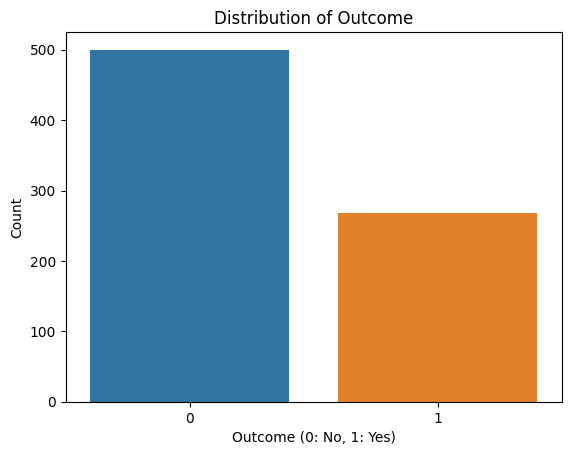

In [76]:
# Lets start by understanding the distribution diabitic Vs Non Diabitic patients in the data set.
sns.countplot(x='Outcome', data=data)
plt.title('Distribution of Outcome')
plt.xlabel('Outcome (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

From the above plot we can infer that majority of the data consists of Non Diabetic Patients.
Lets try to understand the percentage distribution of Diabetic Vs Non Diabetic in the data set.

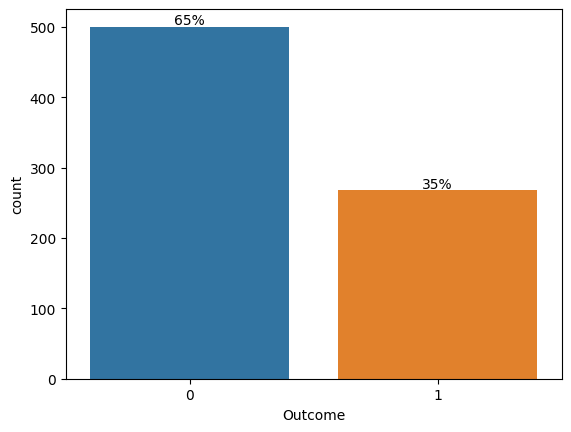

In [77]:
total=float(len(data))
ax = sns.countplot(x="Outcome", data=data)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{0:.0%}'.format(height/total),
            ha="center")

About 65% of the data contains records belonging to Non Diabetic Patients.
The data set has a class imbalance and might have to be treated in future, during the model building stages.

In [78]:
#Lets now plot a corr-plot (correlation plot). This plot will help us understand if there is multi colinearity in the data set.

<ipython-input-92-24a80e48906b>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


<Axes: >

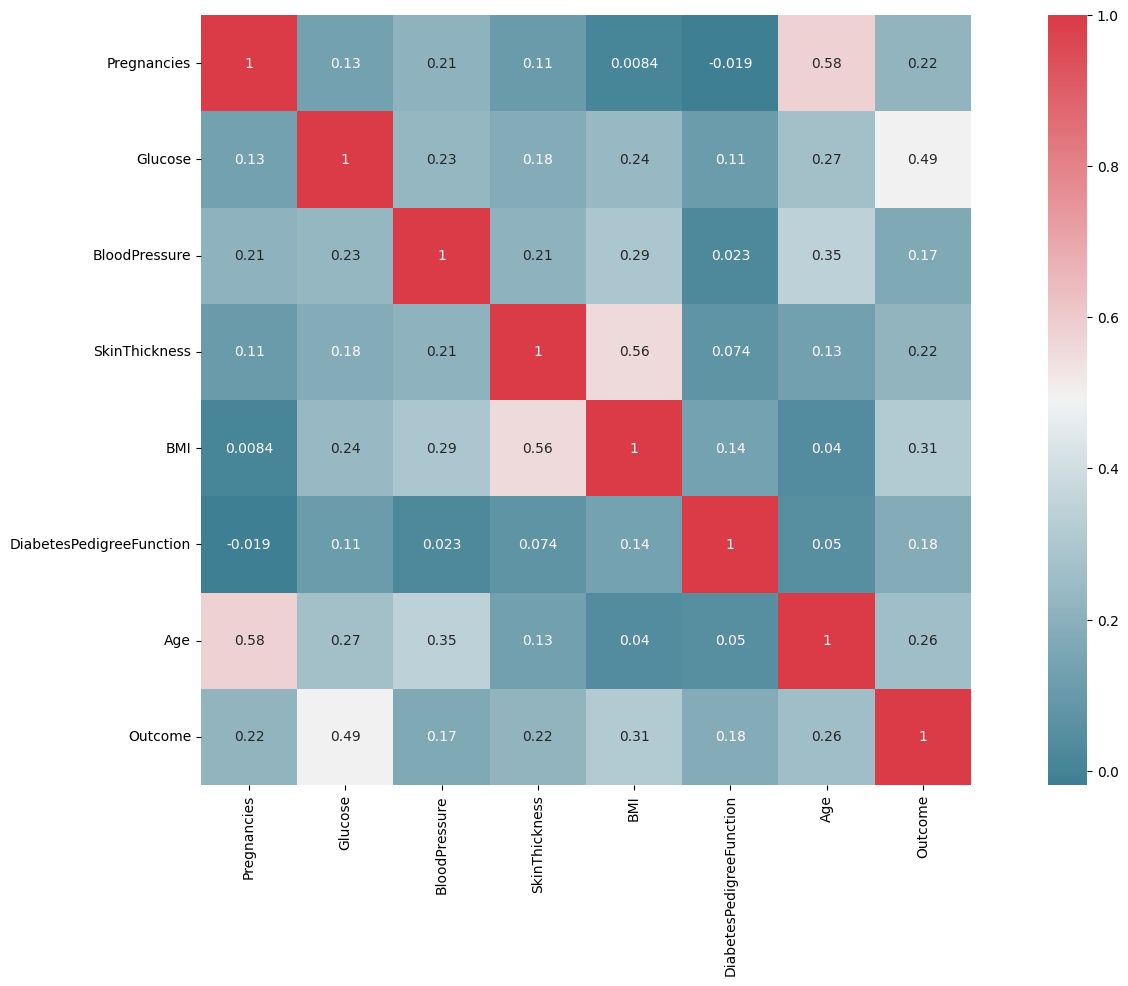

In [92]:
f, ax = plt.subplots(figsize=(20, 10))
corr = data.corr("pearson")
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)

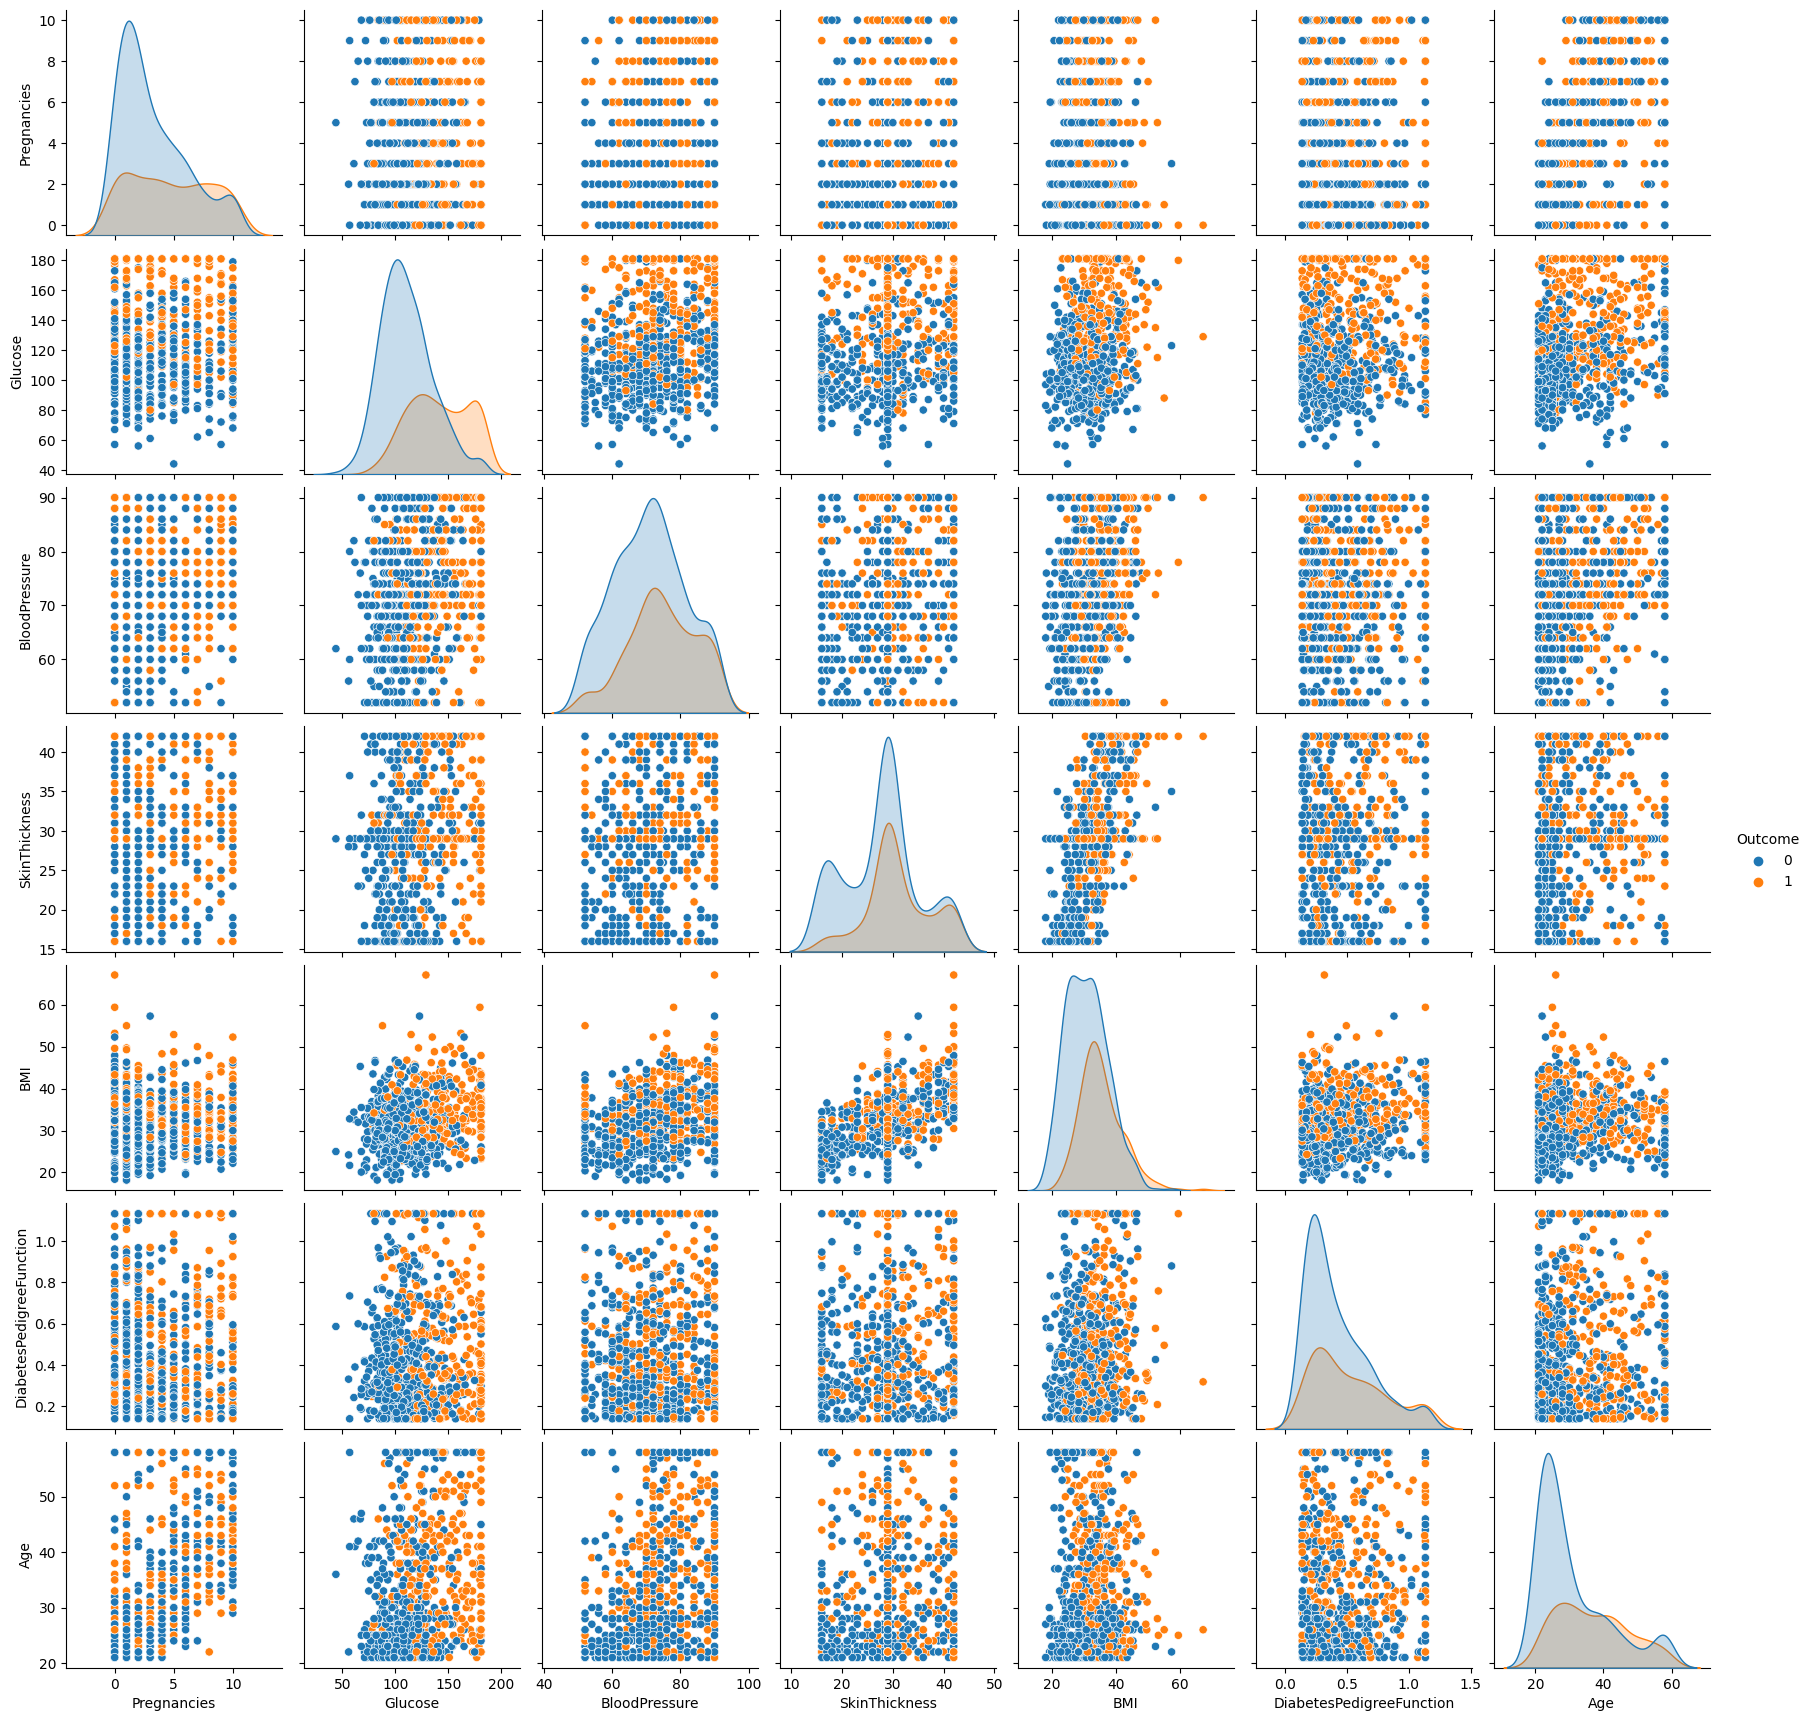

In [94]:
# Pair plot analysis
sns.pairplot(data,hue='Outcome',diag_kind='kde')

From the above pairplot, we can infer that most of the predictor variables are weak predictors of Outcome. The kernal density plots (diagonal) suggests that the distribution for diabetic and non diabetic are very similar and are overlapping each other significantly, hence they wont be able to differentiate between a diabetic patient and a non diabetic patient.

The scatterplots also suggest very poorly corelated data (data with not hidden patterns or relationships). Hence models built on this data might not be able to identify any hidden patterns or might identify nonsense patterns i.e. patterns that do not make sense.

In [95]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [97]:
from sklearn.model_selection import train_test_split
x= data.drop(['Outcome'], axis=1)
y= data['Outcome']
xTrain, xTest, yTrain, yTest = train_test_split(x,y, test_size = 0.2, random_state = 0)


In [100]:
from sklearn.naive_bayes import GaussianNB

#Create a Gaussian Classifier
model = GaussianNB()

In [101]:
model.fit(xTrain,yTrain)

GaussianNB()

In [105]:
Predicted = model.predict(xTest)

In [106]:
print("Predicted Value:", Predicted)

Predicted Value: [1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0]


In [107]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yTest, Predicted))


Accuracy: 0.8246753246753247


The accuracy score represents the proportion of correctly classified samples out of the total number of samples in the test set. In this case, the classifier correctly predicted around 82.47% of the samples in the test set.
To better understand the implications of the accuracy score, consider the nature of the problem you are trying to solve. If it is a binary classification problem with a relatively balanced dataset, an accuracy of 82.47% could be considered quite good. However, if the dataset is highly imbalanced, and one class is significantly more prevalent than the other, a high accuracy score might not be a reliable indicator of the classifier's performance.

Apply Regression Model on this Model

In [109]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [111]:
model1 = LinearRegression()

In [112]:
model1.fit(xTrain,yTrain)

LinearRegression()

In [113]:
y_Predict = model1.predict(xTest)

In [115]:
print("y_Predicted Value:", y_Predict)

y_Predicted Value: [ 9.18253302e-01  1.96833147e-01  6.98638147e-02  6.76787886e-01
  1.66702636e-01 -9.79683972e-02  7.17687503e-01  8.84583419e-01
  4.24170301e-01  4.24599937e-01  6.07187567e-01  1.11500269e+00
  3.69328395e-01  1.60394856e-01  1.13666028e-01  2.10129799e-01
  8.53131036e-01 -1.67128886e-01  4.31546180e-01  2.98594769e-01
  6.06714237e-01  4.33739882e-01  7.89637394e-02 -2.26844501e-02
  6.35295095e-05  3.75116383e-01 -3.45551102e-02  8.74768192e-01
  1.13669856e-01  1.74179994e-01  5.14628306e-01  2.70745766e-01
  1.13046523e-01  4.85504529e-01  1.22684634e-01  6.89944133e-01
  4.50643233e-01  7.09621992e-02  3.32759612e-01  7.13150250e-01
  3.56081481e-01  2.44263499e-01  2.02186693e-01  7.03966671e-01
  7.31193437e-01  1.37220869e-01  5.43629426e-02  2.64824161e-01
  3.81343691e-01  3.48282360e-01  4.29060266e-01  2.30315071e-01
  8.55007000e-01  4.60236281e-01  1.79427279e-01  1.28984250e-01
 -1.61158938e-02  5.24820513e-01  3.38451371e-01  3.55630222e-01
  7.31

In [118]:
from sklearn.metrics import mean_squared_error, r2_score

In [119]:
mse = mean_squared_error(yTest, y_Predict)
r2 = r2_score(yTest, y_Predict)


In [120]:
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.1376648333090988
R-squared (R2): 0.35079356000028106


Let's interpret the Mean Squared Error (MSE) and R-squared (R2) scores for your linear regression model:

Mean Squared Error (MSE):
The Mean Squared Error (MSE) measures the average squared difference between the predicted values and the actual target values. In your case, the MSE value is approximately 0.1377.
Interpretation:

A lower MSE indicates that the model's predictions are closer to the actual target values.
An MSE of 0 means that the model's predictions perfectly match the actual target values, which is rarely achievable in practice.
In your case, an MSE of 0.1377 suggests that, on average, the squared difference between the predicted values and the actual target values is relatively small, indicating decent predictive performance.
R-squared (R2):
The R-squared (R2) value represents the proportion of variance in the target variable that can be explained by the model. It ranges from 0 to 1, with 1 indicating a perfect fit and 0 indicating that the model's predictions are no better than simply using the mean of the target variable. In your case, the R2 value is approximately 0.3508.
Interpretation:

An R2 value close to 1 indicates that the model explains a large proportion of the variance in the target variable, suggesting a good fit to the data.
An R2 value close to 0 suggests that the model does not explain much of the variance in the target variable, indicating poor model performance.
In your case, an R2 value of 0.3508 suggests that the model explains about 35.08% of the variance in the target variable. While this is better than simply using the mean of the target variable (R2=0), it still indicates that there is room for improvement in the model's predictive power.
Overall, based on the MSE and R2 scores, your linear regression model seems to be performing decently, but there is room for improvement. You may consider further refining the model, exploring feature engineering, or trying different algorithms to enhance its predictive performance. Additionally, it's essential to interpret the results in the context of your specific data and the problem you are trying to solve.
